In [1]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict
from dotenv import load_dotenv
from langchain_google_genai import ChatGoogleGenerativeAI
from langgraph.checkpoint.memory import InMemorySaver

In [2]:
load_dotenv()

True

In [3]:
llm = ChatGoogleGenerativeAI(model='gemini-2.5-flash')

In [4]:
class JokeState(TypedDict):

    topic: str
    joke: str
    explanation: str


In [5]:
def generate_joke(state: JokeState):

    prompt = f'Generate a joke on the topic {state["topic"]}'
    response = llm.invoke(prompt).content

    return {'joke': response}



In [6]:
def generate_explanation(state: JokeState):

    prompt = f'Generate a explanation for the joke - {state["joke"]}'
    response = llm.invoke(prompt).content

    return {'explanation': response}

In [7]:
graph = StateGraph(JokeState)

graph.add_node('generate_joke', generate_joke)
graph.add_node('generate_explanation', generate_explanation)

graph.add_edge(START, 'generate_joke')
graph.add_edge('generate_joke', 'generate_explanation')
graph.add_edge('generate_explanation', END)

checkpointer = InMemorySaver()

workflow = graph.compile(checkpointer=checkpointer)

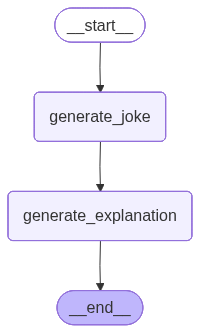

In [8]:
workflow

In [9]:
config1 = {"configurable": {"thread_id": "1"}}
workflow.invoke({'topic':'pizza'}, config=config1)

{'topic': 'pizza',
 'joke': "Why did the pizza maker go broke?\n\nBecause he couldn't make enough **dough**!",
 'explanation': 'This is a classic play on words, or a **pun**!\n\nHere\'s the breakdown:\n\n1.  **Literal Meaning (the Setup):** In the context of a pizza maker, "dough" literally refers to the mixture of flour, water, yeast, etc., that you use to make the pizza crust. So, if you take it literally, it might sound like he just couldn\'t physically produce enough pizza dough.\n\n2.  **Slang/Figurative Meaning (the Punchline):** "Dough" is also a very common slang term for **money**.\n\nThe joke works because it sets you up to think about the literal pizza dough, but the punchline uses the financial meaning. He went broke because he couldn\'t make enough **money** ("dough") to keep his business afloat, not because he couldn\'t physically mix enough flour and water for the pizzas.'}

In [10]:
workflow.get_state(config1)

StateSnapshot(values={'topic': 'pizza', 'joke': "Why did the pizza maker go broke?\n\nBecause he couldn't make enough **dough**!", 'explanation': 'This is a classic play on words, or a **pun**!\n\nHere\'s the breakdown:\n\n1.  **Literal Meaning (the Setup):** In the context of a pizza maker, "dough" literally refers to the mixture of flour, water, yeast, etc., that you use to make the pizza crust. So, if you take it literally, it might sound like he just couldn\'t physically produce enough pizza dough.\n\n2.  **Slang/Figurative Meaning (the Punchline):** "Dough" is also a very common slang term for **money**.\n\nThe joke works because it sets you up to think about the literal pizza dough, but the punchline uses the financial meaning. He went broke because he couldn\'t make enough **money** ("dough") to keep his business afloat, not because he couldn\'t physically mix enough flour and water for the pizzas.'}, next=(), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'chec

In [11]:
list(workflow.get_state_history(config1))

[StateSnapshot(values={'topic': 'pizza', 'joke': "Why did the pizza maker go broke?\n\nBecause he couldn't make enough **dough**!", 'explanation': 'This is a classic play on words, or a **pun**!\n\nHere\'s the breakdown:\n\n1.  **Literal Meaning (the Setup):** In the context of a pizza maker, "dough" literally refers to the mixture of flour, water, yeast, etc., that you use to make the pizza crust. So, if you take it literally, it might sound like he just couldn\'t physically produce enough pizza dough.\n\n2.  **Slang/Figurative Meaning (the Punchline):** "Dough" is also a very common slang term for **money**.\n\nThe joke works because it sets you up to think about the literal pizza dough, but the punchline uses the financial meaning. He went broke because he couldn\'t make enough **money** ("dough") to keep his business afloat, not because he couldn\'t physically mix enough flour and water for the pizzas.'}, next=(), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'che

In [12]:
config2 = {"configurable": {"thread_id": "2"}}
workflow.invoke({'topic':'pasta'}, config=config2)

{'topic': 'pasta',
 'joke': "I've got a serious pasta addiction.\nI just can't stop eating it... I'm completely **pasta** point of no return!",
 'explanation': 'This joke is a classic **pun**!\n\nHere\'s the breakdown:\n\n1.  **The Idiom:** The phrase "past a point of no return" is a common idiom. It means you\'ve gone so far or made a decision that you can\'t go back or change the situation. It implies an irreversible state.\n\n2.  **The Pun:** The word "pasta" (the food) sounds almost exactly like the phrase "past a."\n\n3.  **The Humor:** The joke\'s setup is about a serious addiction to pasta. When the speaker says they are "completely **pasta** point of no return," they are playing on the sound. Instead of saying they are "past a" point of no return (meaning they\'ve gone too far in their addiction), they insert the actual food they\'re addicted to ("pasta") into the idiom.\n\nIt\'s funny because it cleverly uses the subject of the addiction (pasta) to describe the irreversible st

In [13]:
workflow.get_state(config2)

StateSnapshot(values={'topic': 'pasta', 'joke': "I've got a serious pasta addiction.\nI just can't stop eating it... I'm completely **pasta** point of no return!", 'explanation': 'This joke is a classic **pun**!\n\nHere\'s the breakdown:\n\n1.  **The Idiom:** The phrase "past a point of no return" is a common idiom. It means you\'ve gone so far or made a decision that you can\'t go back or change the situation. It implies an irreversible state.\n\n2.  **The Pun:** The word "pasta" (the food) sounds almost exactly like the phrase "past a."\n\n3.  **The Humor:** The joke\'s setup is about a serious addiction to pasta. When the speaker says they are "completely **pasta** point of no return," they are playing on the sound. Instead of saying they are "past a" point of no return (meaning they\'ve gone too far in their addiction), they insert the actual food they\'re addicted to ("pasta") into the idiom.\n\nIt\'s funny because it cleverly uses the subject of the addiction (pasta) to describe 

In [14]:
list(workflow.get_state_history(config2))

[StateSnapshot(values={'topic': 'pasta', 'joke': "I've got a serious pasta addiction.\nI just can't stop eating it... I'm completely **pasta** point of no return!", 'explanation': 'This joke is a classic **pun**!\n\nHere\'s the breakdown:\n\n1.  **The Idiom:** The phrase "past a point of no return" is a common idiom. It means you\'ve gone so far or made a decision that you can\'t go back or change the situation. It implies an irreversible state.\n\n2.  **The Pun:** The word "pasta" (the food) sounds almost exactly like the phrase "past a."\n\n3.  **The Humor:** The joke\'s setup is about a serious addiction to pasta. When the speaker says they are "completely **pasta** point of no return," they are playing on the sound. Instead of saying they are "past a" point of no return (meaning they\'ve gone too far in their addiction), they insert the actual food they\'re addicted to ("pasta") into the idiom.\n\nIt\'s funny because it cleverly uses the subject of the addiction (pasta) to describe

**Time Travel**

In [16]:
workflow.get_state({"configurable": {"thread_id": "1", "checkpoint_id": "1f0dfdbc-87af-6b14-8000-33bd4382a25b"}})


StateSnapshot(values={'topic': 'pizza'}, next=('generate_joke',), config={'configurable': {'thread_id': '1', 'checkpoint_id': '1f0dfdbc-87af-6b14-8000-33bd4382a25b'}}, metadata={'source': 'loop', 'step': 0, 'parents': {}}, created_at='2025-12-23T08:45:50.281986+00:00', parent_config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0dfdbc-879e-6203-bfff-426c5fa97b3a'}}, tasks=(PregelTask(id='614ea8a2-6642-906f-81b7-471219069b45', name='generate_joke', path=('__pregel_pull', 'generate_joke'), error=None, interrupts=(), state=None, result={'joke': "Why did the pizza maker go broke?\n\nBecause he couldn't make enough **dough**!"}),), interrupts=())

In [ ]:
workflow.invoke(None, {"configurable": {"thread_id": "1", "checkpoint_id": "1f06cc6e-7232-6cb1-8000-f71609e6cec5"}})


In [ ]:

list(workflow.get_state_history(config1))

**Updating State**

In [17]:
workflow.update_state({"configurable": {"thread_id": "1", "checkpoint_id": "1f0dfdbc-87af-6b14-8000-33bd4382a25b", "checkpoint_ns": ""}}, {'topic':'samosa'})


{'configurable': {'thread_id': '1',
  'checkpoint_ns': '',
  'checkpoint_id': '1f0dfdc9-668f-646d-8001-199722ccebe1'}}

In [18]:
list(workflow.get_state_history(config1))


[StateSnapshot(values={'topic': 'samosa'}, next=('generate_joke',), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0dfdc9-668f-646d-8001-199722ccebe1'}}, metadata={'source': 'update', 'step': 1, 'parents': {}}, created_at='2025-12-23T08:51:35.774478+00:00', parent_config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0dfdbc-87af-6b14-8000-33bd4382a25b'}}, tasks=(PregelTask(id='75bb51fb-94f2-038b-a372-a33cbde176ca', name='generate_joke', path=('__pregel_pull', 'generate_joke'), error=None, interrupts=(), state=None, result=None),), interrupts=()),
 StateSnapshot(values={'topic': 'pizza', 'joke': "Why did the pizza maker go broke?\n\nBecause he couldn't make enough **dough**!", 'explanation': 'This is a classic play on words, or a **pun**!\n\nHere\'s the breakdown:\n\n1.  **Literal Meaning (the Setup):** In the context of a pizza maker, "dough" literally refers to the mixture of flour, water, yeast, etc., that you use to 

In [20]:
workflow.invoke(None, {"configurable": {"thread_id": "1", "checkpoint_id": "1f0dfdc9-668f-646d-8001-199722ccebe1"}})


{'topic': 'samosa',
 'joke': 'Why did the samosa go to therapy?\n\nBecause it had so much **filling** going on inside!',
 'explanation': 'This joke is a classic **pun**! Here\'s why it\'s funny:\n\n1.  **Literal Meaning (for a Samosa):** A samosa literally has a lot of **filling** inside it – the spiced potato, peas, and other ingredients that make up its delicious center.\n\n2.  **Figurative Meaning (for a Person):** When we say a person has "a lot going on inside," we\'re talking about their thoughts, emotions, worries, stress, or complex internal struggles. These are the kinds of things people typically go to therapy for.\n\nThe humor comes from attributing this very human reason for therapy (emotional complexity) to an inanimate object (a samosa) by using a word ("filling") that perfectly describes both its physical contents and a human\'s emotional state. It\'s an anthropomorphic joke that plays on clever wordplay!'}

In [21]:
list(workflow.get_state_history(config1))

[StateSnapshot(values={'topic': 'samosa', 'joke': 'Why did the samosa go to therapy?\n\nBecause it had so much **filling** going on inside!', 'explanation': 'This joke is a classic **pun**! Here\'s why it\'s funny:\n\n1.  **Literal Meaning (for a Samosa):** A samosa literally has a lot of **filling** inside it – the spiced potato, peas, and other ingredients that make up its delicious center.\n\n2.  **Figurative Meaning (for a Person):** When we say a person has "a lot going on inside," we\'re talking about their thoughts, emotions, worries, stress, or complex internal struggles. These are the kinds of things people typically go to therapy for.\n\nThe humor comes from attributing this very human reason for therapy (emotional complexity) to an inanimate object (a samosa) by using a word ("filling") that perfectly describes both its physical contents and a human\'s emotional state. It\'s an anthropomorphic joke that plays on clever wordplay!'}, next=(), config={'configurable': {'thread_i